original research taken from:
https://colab.research.google.com/drive/1DXkpo9PmH9_HiCSz9NQlZ9vGQtMIYqmF

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import rc
import unittest

%matplotlib inline

sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 14, 8

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)

def run_tests():
  unittest.main(argv=[''], verbosity=1, exit=False)

# Load the data

Data [House Prices: Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques)

In [2]:
#!wget https://raw.githubusercontent.com/Data-Science-FMI/ml-from-scratch-2019/master/data/house_prices_train.csv
!wget https://raw.githubusercontent.com/jayportfolio/capstone_streamlit/main/data/final/df_listings_v06.csv

--2022-11-16 19:28:22--  https://raw.githubusercontent.com/jayportfolio/capstone_streamlit/main/data/final/df_listings_v06.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5116878 (4.9M) [text/plain]
Saving to: ‘df_listings_v06.csv’

df_listings_v06.csv 100%[===================>]   4.88M  2.09MB/s    in 2.3s    

2022-11-16 19:28:25 (2.09 MB/s) - ‘df_listings_v06.csv’ saved [5116878/5116878]



In [18]:
#df_train = pd.read_csv('house_prices_train.csv')
df_train = pd.read_csv('df_listings_v06.csv', index_col=0)
df_train.head()

,Price,bedrooms,bathrooms,nearestStation,location.latitude,location.longitude,latitude_deviation,longitude_deviation,tenure.tenureType
14520525,550000.0,3.0,1.0,0.274316,51.529950,-0.207020,0.030230,0.102600,LEASEHOLD
27953107,400000.0,2.0,2.0,0.305845,51.549390,-0.482600,0.049670,0.378180,LEASEHOLD
33593487,579950.0,2.0,1.0,0.438045,51.447180,-0.338770,0.052540,0.234350,FREEHOLD
35271294,370000.0,2.0,1.0,0.399307,51.449568,-0.140154,0.050152,0.035734,LEASEHOLD
35429088,599950.0,2.0,1.0,0.238187,51.577030,-0.141230,0.077310,0.036810,NaN


# Data exploration

In [19]:
#df_train['SalePrice'].describe()
df_train['Price'].describe()

count     46871.000000
mean     425069.390775
std      107227.324906
min      100000.000000
25%      349950.000000
50%      425000.000000
75%      515000.000000
max      600000.000000
Name: Price, dtype: float64

/tmp/ipykernel_3175/2022824416.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train['Price']);


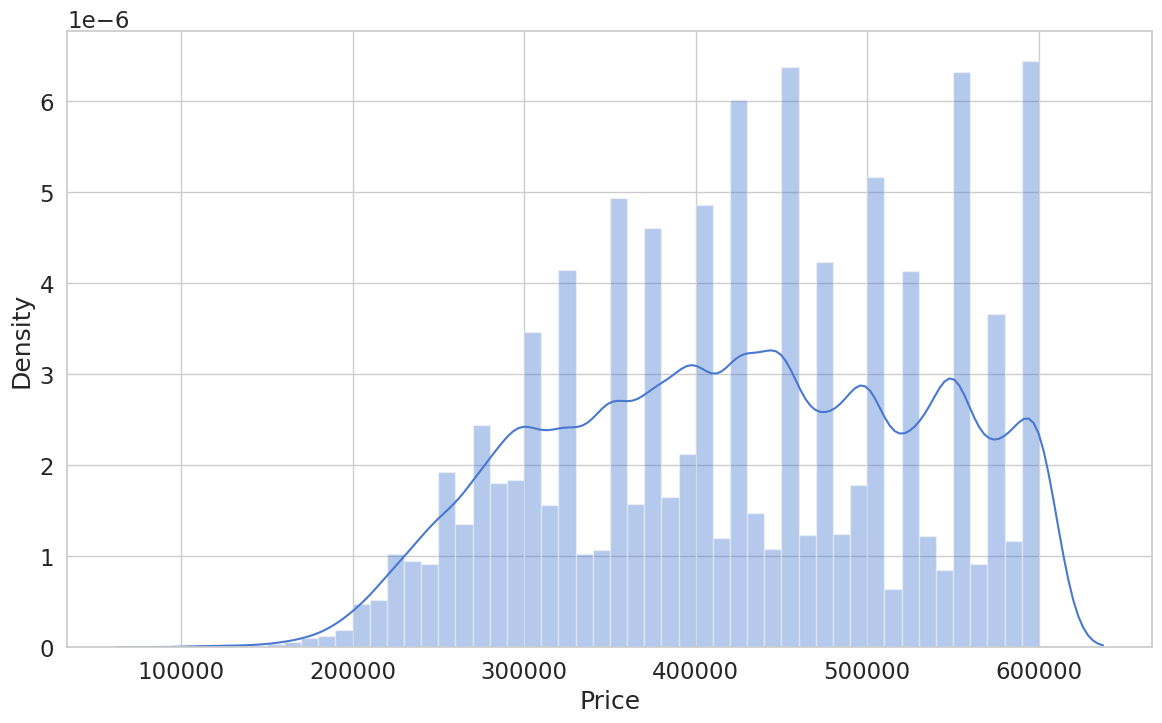

In [20]:
#sns.distplot(df_train['SalePrice']);
sns.distplot(df_train['Price']);

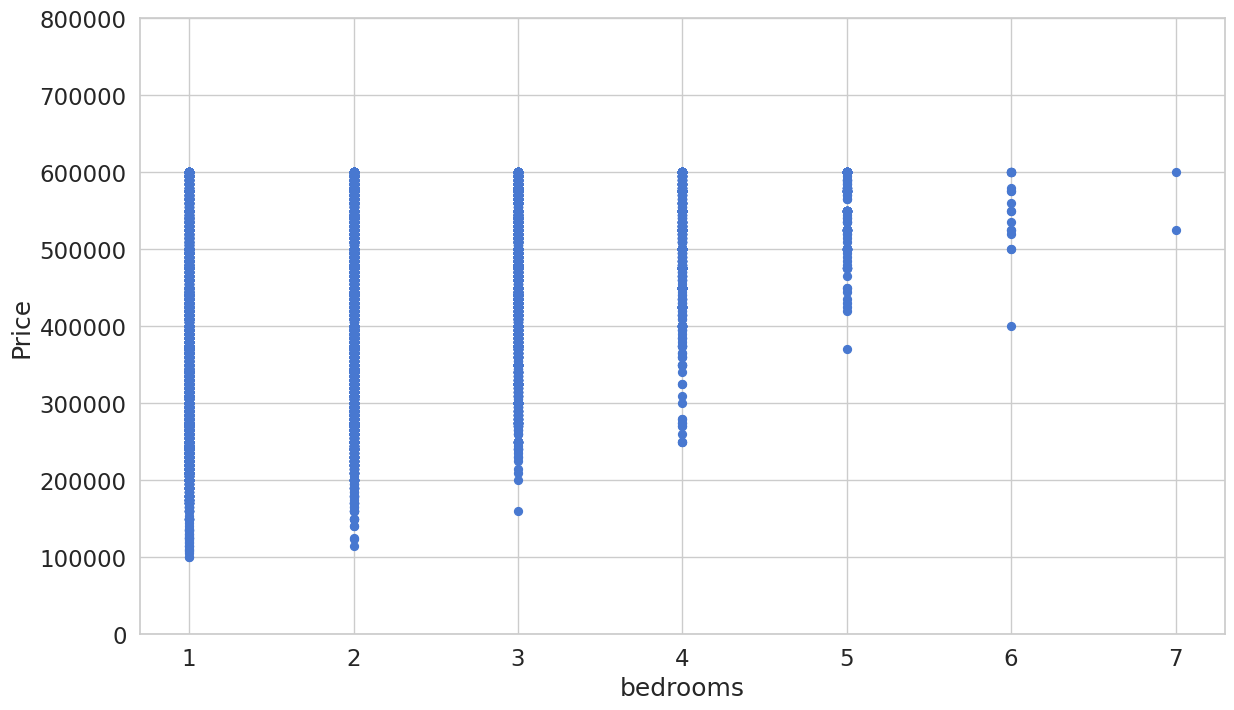

In [30]:
# var = 'GrLivArea'
# data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
# data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000), s=32);

var = 'bedrooms'
data = pd.concat([df_train['Price'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='Price', ylim=(0,800000), s=32);

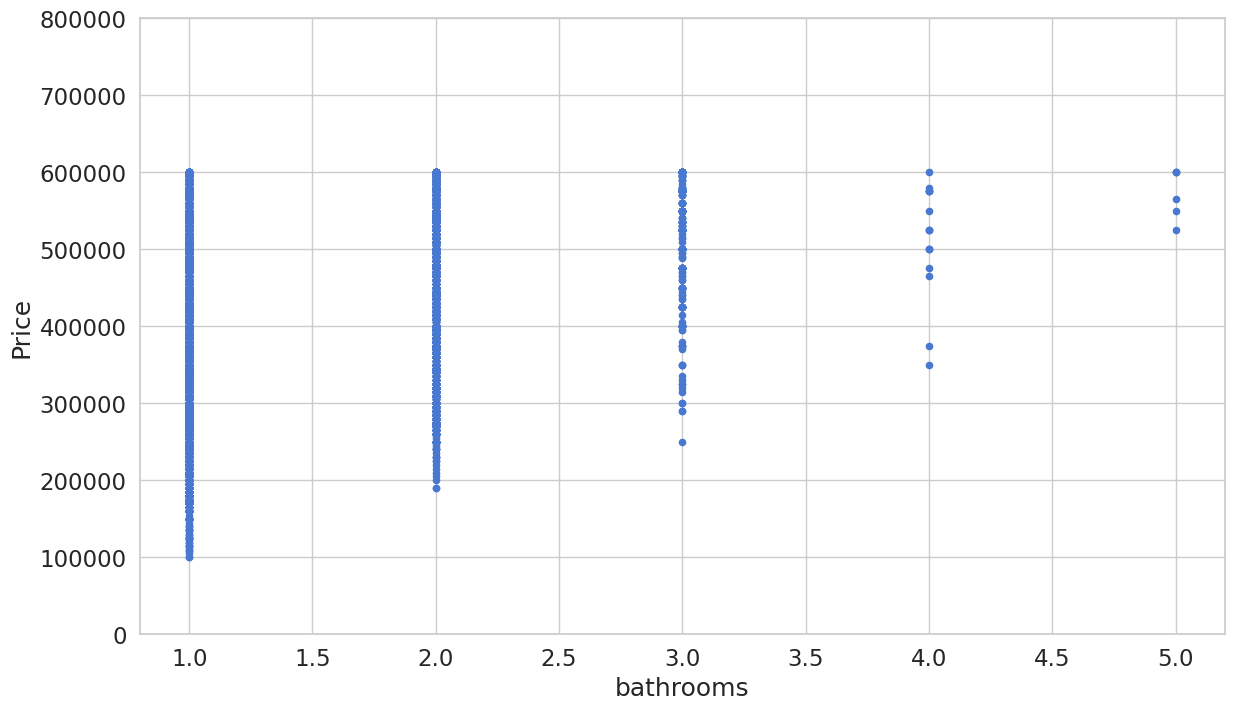

In [22]:
# var = 'TotalBsmtSF'
# data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
# data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

var = 'bathrooms'
data = pd.concat([df_train['Price'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='Price', ylim=(0,800000));

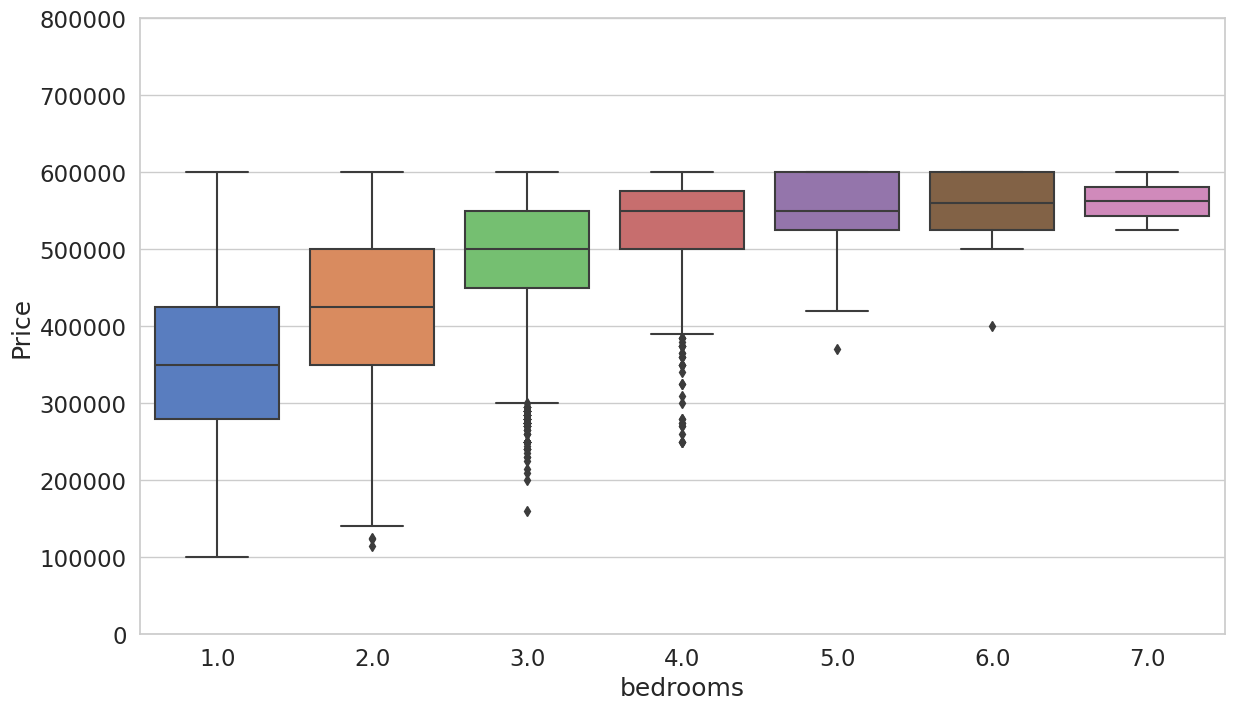

In [23]:
# var = 'OverallQual'
# data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
# f, ax = plt.subplots(figsize=(14, 8))
# fig = sns.boxplot(x=var, y="SalePrice", data=data)
# fig.axis(ymin=0, ymax=800000);

var = 'bedrooms'
data = pd.concat([df_train['Price'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(14, 8))
fig = sns.boxplot(x=var, y="Price", data=data)
fig.axis(ymin=0, ymax=800000);

/tmp/ipykernel_3175/3107751247.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = df_train.corr()


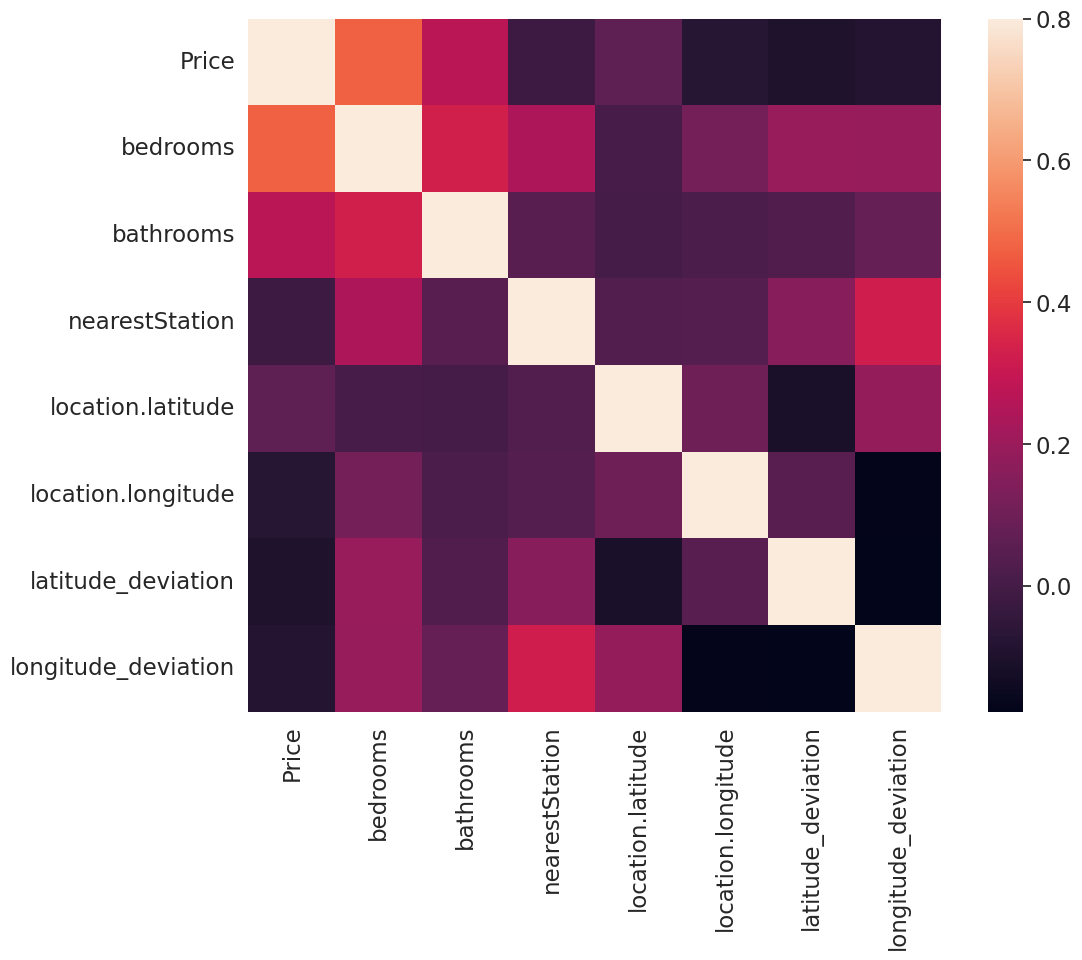

In [24]:
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

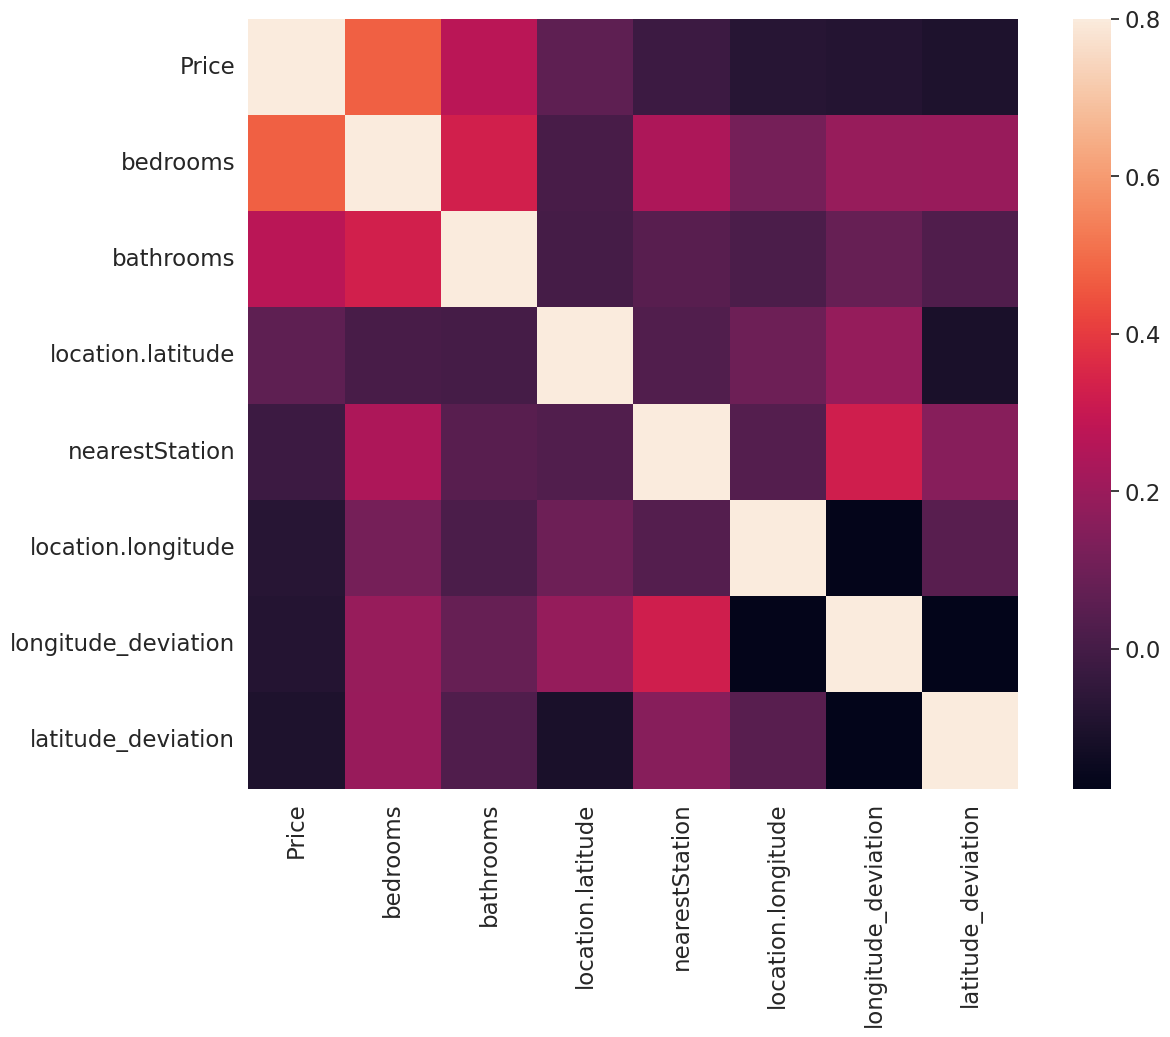

In [26]:
# k = 9 #number of variables for heatmap
# cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
# f, ax = plt.subplots(figsize=(14, 10))
# sns.heatmap(df_train[cols].corr(), vmax=.8, square=True);

k = 9 #number of variables for heatmap
cols = corrmat.nlargest(k, 'Price')['Price'].index
f, ax = plt.subplots(figsize=(14, 10))
sns.heatmap(df_train[cols].corr(), vmax=.8, square=True);

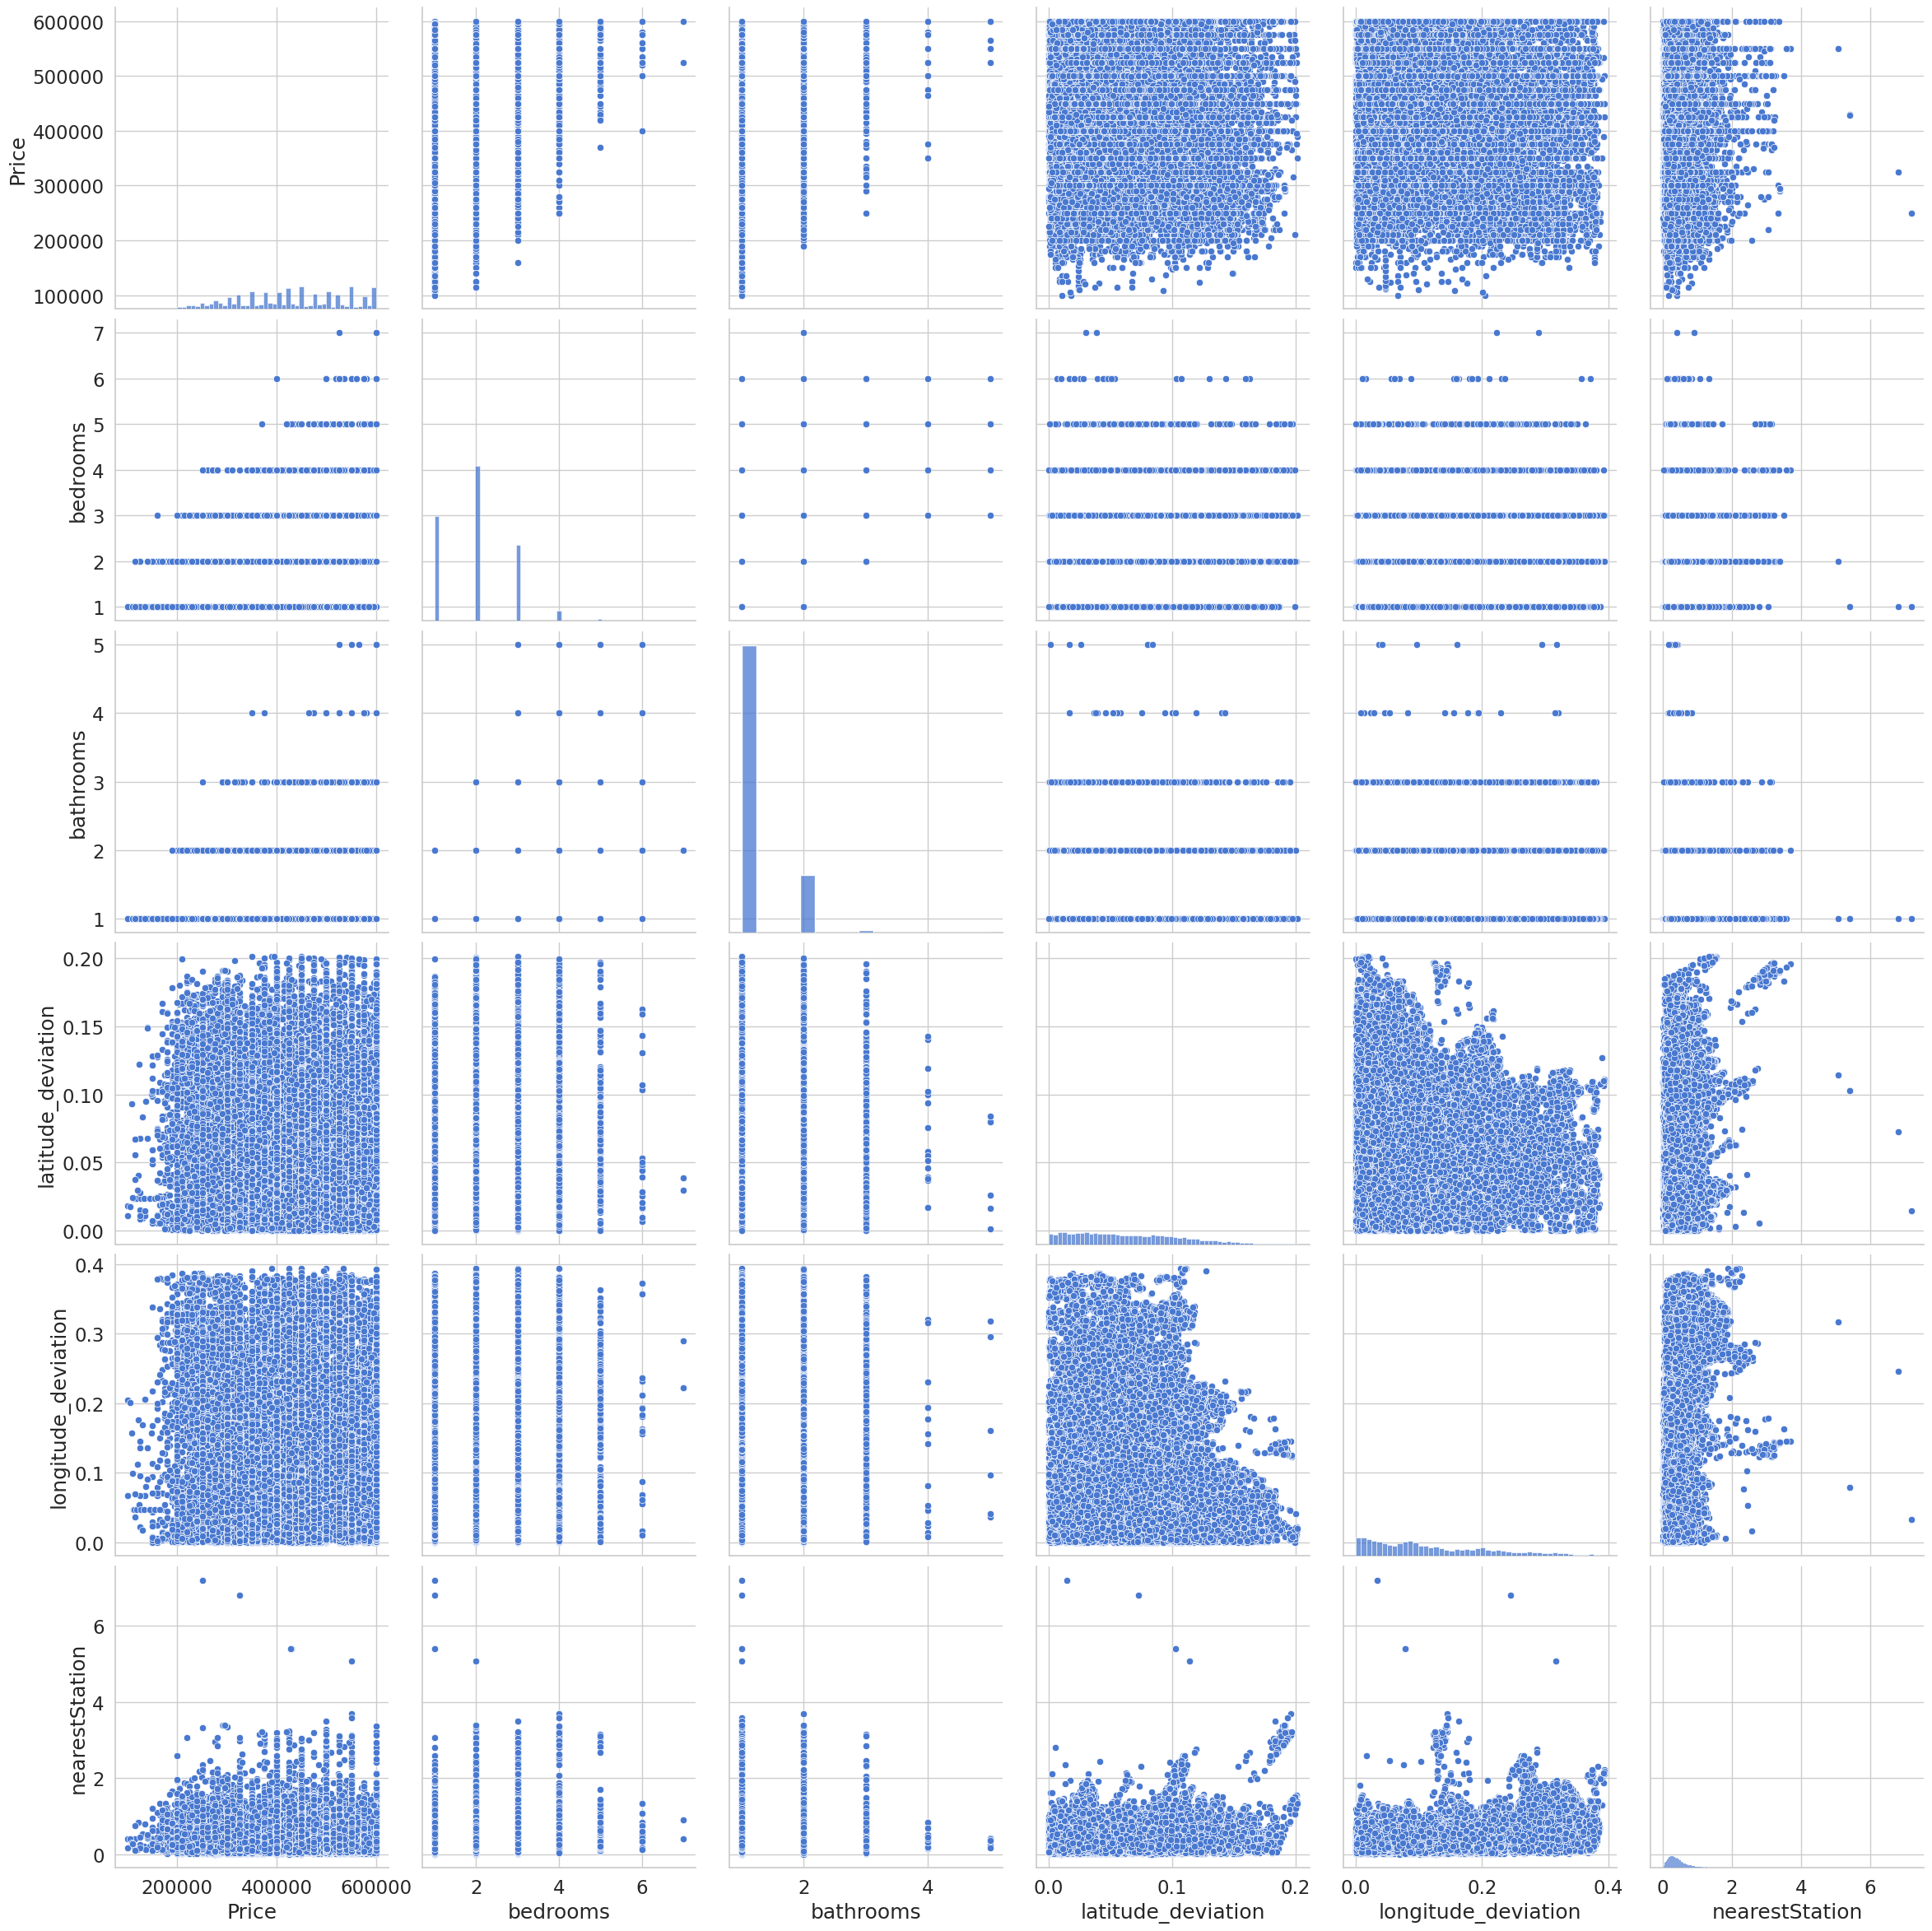

In [31]:
#cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars']
cols = ['Price', 'bedrooms', 'bathrooms', 'latitude_deviation','longitude_deviation','nearestStation']
#sns.pairplot(df_train[cols], size = 4);
sns.pairplot(df_train[cols], height = 4);

## Do we have missing data?

In [32]:
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
tenure.tenureType,2744,0.058544
Price,0,0.000000
bedrooms,0,0.000000
bathrooms,0,0.000000
nearestStation,0,0.000000
location.latitude,0,0.000000
location.longitude,0,0.000000
latitude_deviation,0,0.000000
longitude_deviation,0,0.000000


# Predicting the sale price

## Preparing the data

### Feature scaling

We will do a little preprocessing to our data using the following formula (standardization):

$$x'= \frac{x - \mu}{\sigma}$$

where $\mu$ is the population mean and $\sigma$ is the standard deviation.

![](https://leonardoaraujosantos.gitbooks.io/artificial-inteligence/content/image_folder_5/FeatureScaling.jpg)

**Source: Andrew Ng**

In [33]:
x = df_train['bedrooms']
y = df_train['Price']

x = (x - x.mean()) / x.std()
x = np.c_[np.ones(x.shape[0]), x] 

In [34]:
x.shape

(46871, 2)

## Linear Regression

![](https://i.ytimg.com/vi/zPG4NjIkCjc/maxresdefault.jpg)

**Source: MyBookSucks**

Linear regression models assume that the relationship between a dependent continuous variable $Y$ and one or more explanatory (independent) variables $X$ is linear (that is, a straight line). It’s used to predict values within a continuous range, (e.g. sales, price) rather than trying to classify them into categories (e.g. cat, dog). Linear regression models can be divided into two main types:

### Simple Linear Regression

Simple linear regression uses a traditional slope-intercept form, where $a$ and $b$ are the coefficients that we try to “learn” and produce the most accurate predictions. $X$ represents our input data and $Y$ is our prediction.

$$Y = bX + a$$

![](https://spss-tutorials.com/img/simple-linear-regression-equation-linear-relation.png)

**Source: SPSS tutorials**

### Multivariable Regression

A more complex, multi-variable linear equation might look like this, where w represents the coefficients, or weights, our model will try to learn.

$$ Y(x_1,x_2,x_3) = w_1 x_1 + w_2 x_2 + w_3 x_3 + w_0$$

The variables $x_1, x_2, x_3$ represent the attributes, or distinct pieces of information, we have about each observation.

## Loss function

Given our Simple Linear Regression equation:

$$Y = bX + a$$

We can use the following cost function to find the coefficients:

### Mean Squared Error (MSE) Cost Function

The MSE is defined as:

$$MSE = J(W) =  \frac{1}{m} \sum_{i=1}^{m} (y^{(i)} - h_w(x^{(i)}))^2$$

where

$$h_w(x) = g(w^Tx)$$

The MSE measures how much the average model predictions vary from the correct values. The number is higher when the model is performing "bad" on the training set.

The first derivative of MSE is given by:

$$MSE' = J'(W) = \frac{2}{m} \sum_{i=1}^{m} (h_w(x^{(i)}) - y^{(i)})$$


### One Half Mean Squared Error (OHMSE)

We will apply a small modification to the MSE - multiply by $\frac{1}{2}$ so when we take the derivative, the `2`s cancel out:

$$ OHMSE = J(W) =  \frac{1}{2m} \sum_{i=1}^{m} (y^{(i)} - h_w(x^{(i)}))^2 $$

The first derivative of OHMSE is given by:

$$OHMSE' = J'(W) = \frac{1}{m} \sum_{i=1}^{m} (h_w(x^{(i)}) - y^{(i)})$$

In [35]:
def loss(h, y):
  sq_error = (h - y)**2
  n = len(y)
  return 1.0 / (2*n) * sq_error.sum()

In [36]:
class TestLoss(unittest.TestCase):

  def test_zero_h_zero_y(self):
    self.assertAlmostEqual(loss(h=np.array([0]), y=np.array([0])), 0)

  def test_one_h_zero_y(self):
    self.assertAlmostEqual(loss(h=np.array([1]), y=np.array([0])), 0.5)

  def test_two_h_zero_y(self):
    self.assertAlmostEqual(loss(h=np.array([2]), y=np.array([0])), 2)
    
  def test_zero_h_one_y(self):
    self.assertAlmostEqual(loss(h=np.array([0]), y=np.array([1])), 0.5)
    
  def test_zero_h_two_y(self):
    self.assertAlmostEqual(loss(h=np.array([0]), y=np.array([2])), 2)

In [37]:
run_tests()

.....
----------------------------------------------------------------------
Ran 5 tests in 0.004s

OK


In [38]:
class LinearRegression:
  
  def predict(self, X):
    return np.dot(X, self._W)
  
  def _gradient_descent_step(self, X, targets, lr):

    predictions = self.predict(X)
    
    error = predictions - targets
    gradient = np.dot(X.T,  error) / len(X)

    self._W -= lr * gradient
      
  def fit(self, X, y, n_iter=100000, lr=0.01):

    self._W = np.zeros(X.shape[1])

    self._cost_history = []
    self._w_history = [self._W]
    for i in range(n_iter):
      
        prediction = self.predict(X)
        cost = loss(prediction, y)
        
        self._cost_history.append(cost)
        
        self._gradient_descent_step(x, y, lr)
        
        self._w_history.append(self._W.copy())
    return self

In [39]:
class TestLinearRegression(unittest.TestCase):

    def test_find_coefficients(self):
      clf = LinearRegression()
      clf.fit(x, y, n_iter=2000, lr=0.01)
      np.testing.assert_array_almost_equal(clf._W, np.array([180921.19555322,  56294.90199925]))

In [40]:
run_tests()

F.....
FAIL: test_find_coefficients (__main__.TestLinearRegression)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "/tmp/ipykernel_3175/2036669960.py", line 6, in test_find_coefficients
    np.testing.assert_array_almost_equal(clf._W, np.array([180921.19555322,  56294.90199925]))
  File "/home/guava/PycharmProjects/capstone_streamlit/venv/lib/python3.8/site-packages/numpy/testing/_private/utils.py", line 1046, in assert_array_almost_equal
    assert_array_compare(compare, x, y, err_msg=err_msg, verbose=verbose,
  File "/home/guava/PycharmProjects/capstone_streamlit/venv/lib/python3.8/site-packages/numpy/testing/_private/utils.py", line 844, in assert_array_compare
    raise AssertionError(msg)
AssertionError: 
Arrays are not almost equal to 6 decimals

Mismatched elements: 2 / 2 (100%)
Max absolute difference: 244148.19442923
Max relative difference: 1.34947259
 x: array([425069.389982,  50725.214967])
 y: array([180921.

In [41]:
clf = LinearRegression()
clf.fit(x, y, n_iter=2000, lr=0.01)

In [42]:
clf._W

array([425069.38998245,  50725.21496698])

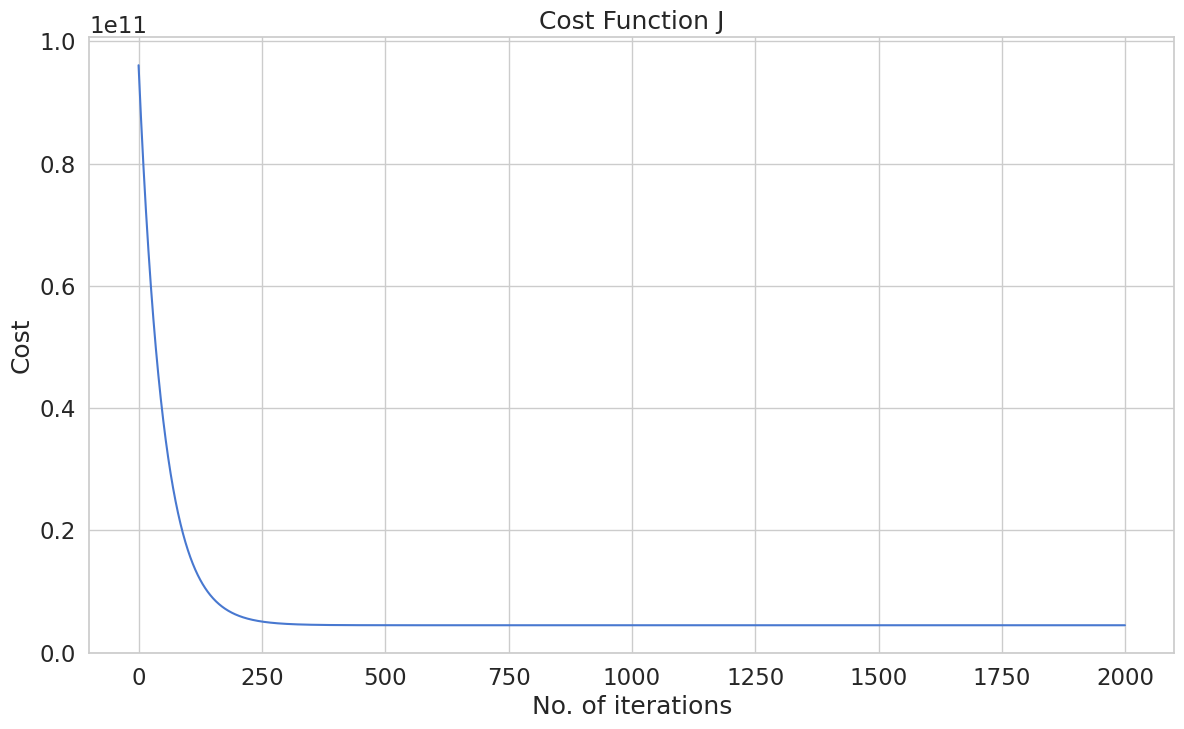

In [43]:
plt.title('Cost Function J')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot(clf._cost_history)
plt.show()

In [44]:
clf._cost_history[-1]

4462230677.304062

In [31]:
#Animation

#Set the plot up,
fig = plt.figure(figsize=(5,5))
ax = plt.axes()
plt.title('Sale Price vs Living Area')
plt.xlabel('Living Area in square feet (normalised)')
plt.ylabel('Sale Price ($)')
plt.scatter(x[:,1], y)
line, = ax.plot([], [], lw=2, color='red')
annotation = ax.text(-1, 700000, '')
annotation.set_animated(True)
plt.close()

#Generate the animation data,
def init():
    line.set_data([], [])
    annotation.set_text('')
    return line, annotation

# animation function.  This is called sequentially
def animate(i):
    x = np.linspace(-5, 20, 1000)
    y = clf._w_history[i][1]*x + clf._w_history[i][0]
    line.set_data(x, y)
    annotation.set_text('Cost = %.2f e10' % (clf._cost_history[i]/10000000000))
    return line, annotation

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=300, interval=10, blit=True)

rc('animation', html='jshtml')

anim

# Multivariable Linear Regression

Let's use more of the available data to build a Multivariable Linear Regression model and see whether or not that will improve our OHMSE error:

In [26]:
x = df_train[['OverallQual', 'GrLivArea', 'GarageCars']]

x = (x - x.mean()) / x.std()
x = np.c_[np.ones(x.shape[0]), x] 

clf = LinearRegression()
clf.fit(x, y, n_iter=2000, lr=0.01)

In [27]:
clf._W

array([180921.19555322,  37478.604254  ,  26631.93830568,  15921.22581327])

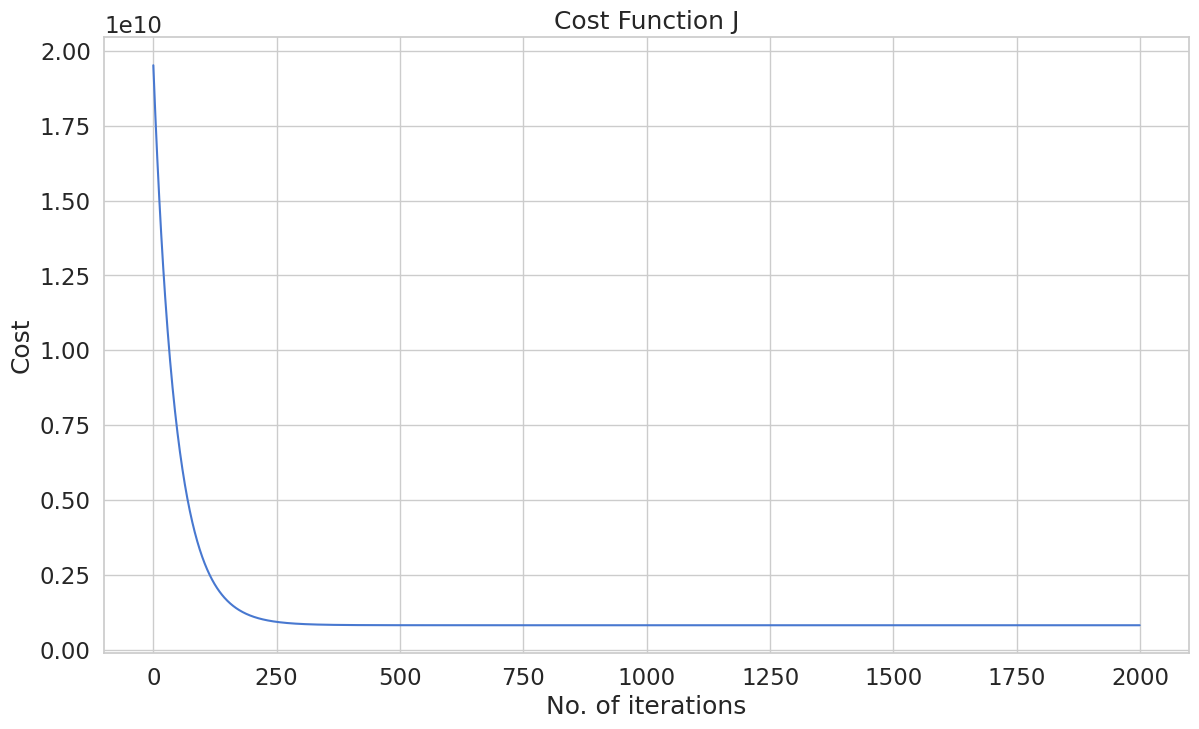

In [28]:
plt.title('Cost Function J')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot(clf._cost_history)
plt.show()

In [29]:
clf._cost_history[-1]

822817042.8437101